# THIS PROJECT CREATED BY :
EL KORCHI MOHAMED 
LABHALLA KAHLID
BOULLOUL EL MEHDI

# SUPERVISED BY :
MR. ABDERRAHMANE ESSADIQ

# THIS PROJECT ABOUT ETL(EXTRACT,TRANSFORM,LOAD) AND MAKE DECISION USING PYTHON 

In [1]:
from TwitterAPI import TwitterAPI, TwitterOAuth, TwitterRequestError, TwitterConnectionError, TwitterPager
import pandas as pd
import tweepy
import time
import twython
import csv
import ssl
import re
from wordcloud import WordCloud
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [2]:
consumer_key= "ZCv6Qwirj21KKN6uQyrEstRmm"
consumer_secret= "L2pQRqN1scd6fDUH7GeRs4UJjc0DqaA03tXUjdQ1jn5AXkRda9"
access_token_key= "1540373260734529541-GZDGXZ4Vm6mgwGQRnHH2IcrrVWyPrm"
access_token_secret= "ls2PVQ8rUNebKdF4ow4rpt5UPsK16L6HPXBOlHFqTMCS4"

In [3]:
authenticate= tweepy.OAuthHandler(consumer_key,consumer_secret)
authenticate.set_access_token(access_token_key,access_token_secret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)
searchTheme="#Mercedes -is:retweets"
ssl._create_default_https_context = ssl._create_unverified_context

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api1 = tweepy.API(auth)
##api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [4]:

#def get_new_tweets():
print("Retrieving tweets")
corpus = []                                                                                        
tweets=tweepy.Cursor(api.search_tweets,q="#Mercedes",lang="en",tweet_mode="extended").items(3000)        
time.sleep(4)
corpus.extend(tweets)                                                                          
data = [[tweet.id_str, tweet.user.id_str, tweet.full_text, tweet.created_at,tweet.favorite_count,tweet.retweet_count,tweet.in_reply_to_status_id_str] for tweet in corpus]
tweets = pd.DataFrame(data, columns=['tweet_id', 'publisher id', 'text', 'creation date','favotits_count','retweet_count','in_reply_to_status_id_str'])  





user_data= [[tweet.author.id_str, tweet.user.screen_name, tweet.author.created_at,tweet.author.location,tweet.author.verified] for tweet in corpus]
users = pd.DataFrame(user_data, columns=['user id', 'screen_name','account creation date','location','is_verified'])  

users.head()       

# VIEW THE DATAFRAME HEAD WITH THE TWEETS RETRIEVED
tweets.head()



Retrieving tweets


Rate limit reached. Sleeping for: 744


KeyboardInterrupt: 

In [13]:
#tweets.to_excel("all_tweet.xlsx")
users["account creation date"].apply(lambda a: pd.to_datetime(a).date()) 
#users.to_excel("user.xlsx")
#user_data.to_excel("users.xlsx")

0       2021-06-26
1       2021-09-18
2       2009-10-27
3       2012-07-15
4       2017-12-11
           ...    
1168    2012-08-04
1169    2012-08-04
1170    2019-05-09
1171    2019-01-15
1172    2013-06-04
Name: account creation date, Length: 1173, dtype: object

In [16]:
#users.to_excel("user.xlsx")
users["account creation date"] = users["account creation date"].dt.tz_localize(None)
users.to_excel("user.xlsx")


In [ ]:
#get all replies on each tweet
replies=[]
print("get replies 1")
for indice in tweets.index:
    for tweet in tweepy.Cursor(api1.search_tweets,q='to:'+tweets['screen_name'][indice]).items(100):
        if hasattr(tweet, 'in_reply_to_status_id_str'):
            if (tweet.in_reply_to_status_id_str==tweets['tweet_id'][indice]):
                replies.append(tweet)


with open('replies_clean.csv', 'w') as f:
    csv_writer = csv.DictWriter(f, fieldnames=('user', 'text'))
    csv_writer.writeheader()
    for tweet in replies:
        row = {'user': tweet.user.screen_name, 'text':tweet.text.replace('\n', ' ')}
        csv_writer.writerow(row)

In [17]:
# clean all tweet 

def clean_text(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#+','',text)
    text=re.sub(r'\n+','',text)
    text=re.sub(r'RT:[\s]+','',text)
    text=re.sub(r'https:\/\/\s+','',text)
    text=re.sub(r';+','',text)

    return text


tweets['text']=tweets['text'].apply(clean_text)

#tweets.to_csv("tweets.csv")
tweets.head()


,tweet_id,publisher id,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str
0,1545421575775723521,1408641584376303616,Nismo GT-R at night ✨🇯🇵Follow us 👉https://t.co...,2022-07-08 14:56:30+00:00,0,0,None
1,1545419467601182720,1439110665067798530,Delorean back to the future edit ⚡️Follow us 👉...,2022-07-08 14:48:08+00:00,0,0,None
2,1545418623510093827,85686720,Seat Leon vs. Mercedes C-Class - which would y...,2022-07-08 14:44:46+00:00,0,0,None
3,1545418090569252865,636148585,RT : The crash between Lewis Hamilton and Max ...,2022-07-08 14:42:39+00:00,0,35,None
4,1545416802783662087,940277332308262913,"Check your wheel alignment once a 3 month, If ...",2022-07-08 14:37:32+00:00,0,0,None


In [18]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity    
    
tweets['subjectivity']=tweets['text'].apply(getSubjectivity)
tweets['polarity']=tweets['text'].apply(getPolarity)
tweets


,tweet_id,publisher id,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,subjectivity,polarity
0,1545421575775723521,1408641584376303616,Nismo GT-R at night ✨🇯🇵Follow us 👉https://t.co...,2022-07-08 14:56:30+00:00,0,0,None,0.000000,0.0
1,1545419467601182720,1439110665067798530,Delorean back to the future edit ⚡️Follow us 👉...,2022-07-08 14:48:08+00:00,0,0,None,0.062500,0.0
2,1545418623510093827,85686720,Seat Leon vs. Mercedes C-Class - which would y...,2022-07-08 14:44:46+00:00,0,0,None,0.000000,0.0
3,1545418090569252865,636148585,RT : The crash between Lewis Hamilton and Max ...,2022-07-08 14:42:39+00:00,0,35,None,0.066667,0.0
4,1545416802783662087,940277332308262913,"Check your wheel alignment once a 3 month, If ...",2022-07-08 14:37:32+00:00,0,0,None,0.300000,1.0
...,...,...,...,...,...,...,...,...,...
1168,1543870498555465728,737099436,MERCEDES-BENZ GLA180 - 2021 - 40765 km. for mo...,2022-07-04 08:13:05+00:00,0,0,None,0.500000,0.5
1169,1543869292726439936,737099436,MERCEDES-BENZ R 320 CDI 4 MATIC - 2006 - 20176...,2022-07-04 08:08:17+00:00,0,0,None,0.500000,0.5
1170,1543868831256526850,1126589124419497984,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:06:27+00:00,0,857,None,0.000000,0.0
1171,1543867480376070149,1085276925344518145,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:01:05+00:00,0,857,None,0.000000,0.0


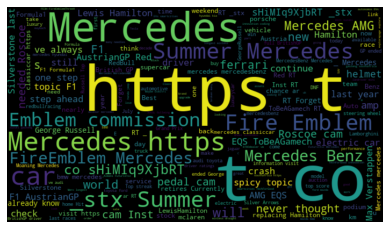

In [19]:
all_words=''.join([twts for twts in tweets['text']])
word_Cloud=WordCloud(width=700,height=400,random_state=40,max_font_size=119).generate(all_words)

plt.imshow(word_Cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neural'
    else :
        return 'Positive' 

tweets['Analyse']= tweets['polarity'].apply(getAnalysis)

tweets

,tweet_id,publisher id,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,subjectivity,polarity,Analyse
0,1545421575775723521,1408641584376303616,Nismo GT-R at night ✨🇯🇵Follow us 👉https://t.co...,2022-07-08 14:56:30+00:00,0,0,None,0.000000,0.0,Neural
1,1545419467601182720,1439110665067798530,Delorean back to the future edit ⚡️Follow us 👉...,2022-07-08 14:48:08+00:00,0,0,None,0.062500,0.0,Neural
2,1545418623510093827,85686720,Seat Leon vs. Mercedes C-Class - which would y...,2022-07-08 14:44:46+00:00,0,0,None,0.000000,0.0,Neural
3,1545418090569252865,636148585,RT : The crash between Lewis Hamilton and Max ...,2022-07-08 14:42:39+00:00,0,35,None,0.066667,0.0,Neural
4,1545416802783662087,940277332308262913,"Check your wheel alignment once a 3 month, If ...",2022-07-08 14:37:32+00:00,0,0,None,0.300000,1.0,Positive
...,...,...,...,...,...,...,...,...,...,...
1168,1543870498555465728,737099436,MERCEDES-BENZ GLA180 - 2021 - 40765 km. for mo...,2022-07-04 08:13:05+00:00,0,0,None,0.500000,0.5,Positive
1169,1543869292726439936,737099436,MERCEDES-BENZ R 320 CDI 4 MATIC - 2006 - 20176...,2022-07-04 08:08:17+00:00,0,0,None,0.500000,0.5,Positive
1170,1543868831256526850,1126589124419497984,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:06:27+00:00,0,857,None,0.000000,0.0,Neural
1171,1543867480376070149,1085276925344518145,"RT _stx: Summer Mercedes from Fire Emblem, com...",2022-07-04 08:01:05+00:00,0,857,None,0.000000,0.0,Neural


In [21]:
j=1
sortedTweets=tweets.sort_values(by=['polarity'])
for i in range(0,sortedTweets.shape[0]):
    if sortedTweets['Analyse'][i]=="Positive":
        print(str(j)+')'+sortedTweets['text'][i])
        print()
        j=j+1
        


1)Check your wheel alignment once a 3 month, If you haven't then EliteAutoRepair is the best repair-pal you got. Call now or visit our website to set up an appointment. https://t.co/PRhFiekxiF  .eliteautorepair wefixcars Mercedes Porsche brakes brakerepairs  caralignment https://t.co/p7ZcysAdA5

2)RT : GeorgeRussell can lead Mercedes to success with or without me, LewisHamilton declares  Read more here &gt&gt https://…

3)MERCEDES-BENZ B 200 AUTO - 2015 - 150832 km. for more information visit https://t.co/AkjkbBqJ7s https://t.co/Cqdv43wer3

4)New in stock: Mercedes-Benz Actros 2541 8x2 Palfinger 44 TM load crane! - Palfinger 44 Tonmeter crane (type PK44002)- Radio remote controlAll specs: https://t.co/XrxRzpfH2M MERCEDES MERCEDESBENZ BENZ MBTRUCKS ACTROS PALFINGER LOADCRANE CLEANMAT CLEANMATTRUCKS https://t.co/dIIdSWYz7h

5)RBR and Ferrari: We would like to continue cheating with our flexi-floors.FIA: OK. TD delayed until you get enough pts to ensure Mercedes finishes no higher than 3r

In [22]:
j=1
sortedTweets=tweets.sort_values(by=['polarity'],ascending=False)
for i in range(0,sortedTweets.shape[0]):
    if sortedTweets['Analyse'][i]=="Negative":
        print(str(j)+')'+sortedTweets['text'][i])
        print()
        j=j+1
        

1)The Mercedes-Benz AMG® GT takes driving performance to dimensions far beyond the ordinary. MercedesBenzOfGreenwich https://t.co/ogTL8r9XOw

2)Our favourite roller coaster is back 🎢 The Nurburgring Endurance Series, watch round 5 live here ➡️ https://t.co/pN2qYhP1NONBR Nurburgring BMW Mercedes Racing Motorsport Nuerburgring https://t.co/pQGZ4ZJ9rj

3)Watching F1races from previous years.  mercedes before the race start had 40 gap from Bottas and lap everyone else. I guess that how LH and Mercedes’ like it.

4)Sonderausstellung "55 YEARS AMG - CHANGING THE GAME" im Museum - https://t.co/uKieTZqxzc MBCars Mercedes MercedesBenz amg automotive https://t.co/qiYF3Lelkc

5)RT : I’ve been a bit quiet, lots of things going on but trying to work it all out, here’s a little work in progress on a perso…

6)RT : New helmet design of George Russell for the second half of the season!Design: _designs Paintjob: JMD Designsgr63 russe…

7)RT : Mercedes AMG Black Series ♠️ https://t.co/9Ual22it3q

8)RT :

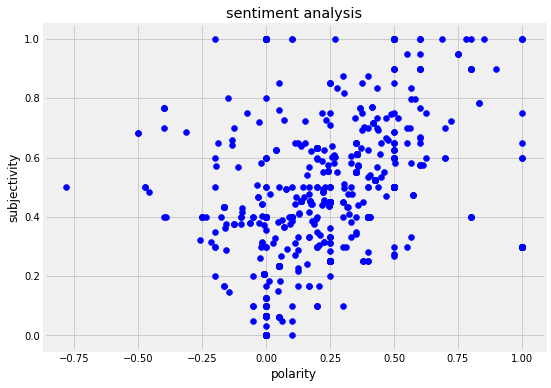

In [23]:
plt.figure(figsize=(8,6))

for i in range(0,tweets.shape[0]):
    plt.scatter(tweets["polarity"][i],tweets["subjectivity"][i],color='blue')

plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()


In [24]:
ptweets=tweets[tweets.Analyse=='Positive']
ptweets=ptweets['text']

per=round((ptweets.shape[0]/tweets.shape[0])*100,1)
print("percentage of the good tweets is "+str(per))

ptweets


percentage of the good tweets is 41.7


4       Check your wheel alignment once a 3 month, If ...
6       RT : GeorgeRussell can lead Mercedes to succes...
8       MERCEDES-BENZ B 200 AUTO - 2015 - 150832 km. f...
18      New in stock: Mercedes-Benz Actros 2541 8x2 Pa...
24      RBR and Ferrari: We would like to continue che...
                              ...                        
1158    I haven’t roared like that for months, it felt...
1166    Mercedes CLK GTR Roadster, in legendary black ...
1167    Is  vindicated? What does _kidd think about th...
1168    MERCEDES-BENZ GLA180 - 2021 - 40765 km. for mo...
1169    MERCEDES-BENZ R 320 CDI 4 MATIC - 2006 - 20176...
Name: text, Length: 489, dtype: object

In [25]:
ptweets=tweets[tweets.Analyse=='Negative']
ptweets=ptweets['text']

per=round((ptweets.shape[0]/tweets.shape[0])*100,1)
print("percentage of the negative tweets is "+str(per))

ptweets


percentage of the negative tweets is 7.5


13      The Mercedes-Benz AMG® GT takes driving perfor...
19      Our favourite roller coaster is back 🎢 The Nur...
30      Watching F1races from previous years.  mercede...
37      Sonderausstellung "55 YEARS AMG - CHANGING THE...
48      RT : I’ve been a bit quiet, lots of things goi...
                              ...                        
951     ElectricVehicles sold in UK passes half a mill...
1029    RT : 🚘 • MERCEDES-BENZ ML350📋 • FOREIGN USED🗓 ...
1035    Article from February. Only 10/11 races to lat...
1142    Is F1 amongst the most dangerous sports in the...
1152    "Key complaints related to questionable percei...
Name: text, Length: 88, dtype: object

In [26]:
ptweets=tweets[tweets.Analyse=='Neural']
ptweets=ptweets['text']

per=round((ptweets.shape[0]/tweets.shape[0])*100,1)
print("percentage of the neutral tweets is "+str(per))

ptweets

percentage of the neutral tweets is 50.8


0       Nismo GT-R at night ✨🇯🇵Follow us 👉https://t.co...
1       Delorean back to the future edit ⚡️Follow us 👉...
2       Seat Leon vs. Mercedes C-Class - which would y...
3       RT : The crash between Lewis Hamilton and Max ...
5       Can someone tell us why the  qualifying is on ...
                              ...                        
1164    RT _stx: Summer Mercedes from Fire Emblem, com...
1165    Mercedes Benz 300SL Roadster https://t.co/5n7f...
1170    RT _stx: Summer Mercedes from Fire Emblem, com...
1171    RT _stx: Summer Mercedes from Fire Emblem, com...
1172    SELL ME YOUR VOLKSWAGENI buy ALL makes of cars...
Name: text, Length: 596, dtype: object

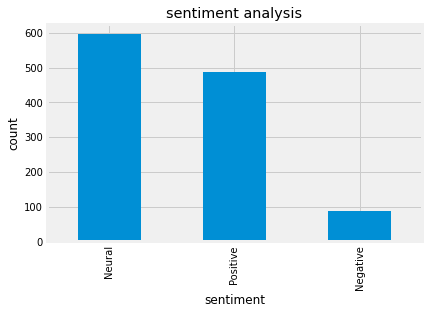

In [27]:
tweets['Analyse'].value_counts()

plt.title("sentiment analysis")
plt.xlabel("sentiment")
plt.ylabel("count")
tweets["Analyse"].value_counts().plot(kind='bar')
plt.show()

In [32]:
# save all data in a csv file 

tweets["creation date"].apply(lambda a: pd.to_datetime(a).date()) 
tweets["creation date"] = tweets["creation date"].dt.tz_localize(None)
tweets.to_excel("all_tweet.xlsx")
tweets.head()






,tweet_id,publisher id,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,subjectivity,polarity,Analyse
0,1545421575775723521,1408641584376303616,Nismo GT-R at night ✨🇯🇵Follow us 👉https://t.co...,2022-07-08 14:56:30,0,0,None,0.000000,0.0,Neural
1,1545419467601182720,1439110665067798530,Delorean back to the future edit ⚡️Follow us 👉...,2022-07-08 14:48:08,0,0,None,0.062500,0.0,Neural
2,1545418623510093827,85686720,Seat Leon vs. Mercedes C-Class - which would y...,2022-07-08 14:44:46,0,0,None,0.000000,0.0,Neural
3,1545418090569252865,636148585,RT : The crash between Lewis Hamilton and Max ...,2022-07-08 14:42:39,0,35,None,0.066667,0.0,Neural
4,1545416802783662087,940277332308262913,"Check your wheel alignment once a 3 month, If ...",2022-07-08 14:37:32,0,0,None,0.300000,1.0,Positive


In [42]:
#users.sort_values("user id", inplace = True)
 

users.drop_duplicates(subset ="user id",
                 keep = False, inplace = True)

#
#users.sort_index()



tweets.to_csv("all tweets.csv")
tweets.head()      

,tweet_id,publisher id,text,creation date,favotits_count,retweet_count,in_reply_to_status_id_str,subjectivity,polarity,Analyse
0,1545421575775723521,1408641584376303616,Nismo GT-R at night ✨🇯🇵Follow us 👉https://t.co...,2022-07-08 14:56:30,0,0,None,0.000000,0.0,Neural
1,1545419467601182720,1439110665067798530,Delorean back to the future edit ⚡️Follow us 👉...,2022-07-08 14:48:08,0,0,None,0.062500,0.0,Neural
2,1545418623510093827,85686720,Seat Leon vs. Mercedes C-Class - which would y...,2022-07-08 14:44:46,0,0,None,0.000000,0.0,Neural
3,1545418090569252865,636148585,RT : The crash between Lewis Hamilton and Max ...,2022-07-08 14:42:39,0,35,None,0.066667,0.0,Neural
4,1545416802783662087,940277332308262913,"Check your wheel alignment once a 3 month, If ...",2022-07-08 14:37:32,0,0,None,0.300000,1.0,Positive
